# Finding the Optimal value of Eps

- Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.
- In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. We then plot the average k-distances in ascending order on a k-distance graph
- The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.


Text(0, 0.5, 'Distance')

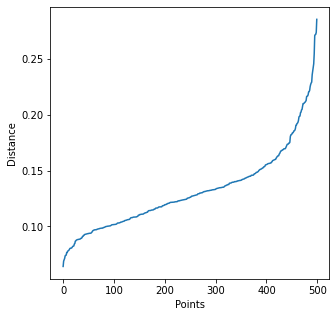

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors


X, y = make_moons(n_samples=500, noise=0.1)
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.16004349389571995


<Figure size 360x360 with 0 Axes>

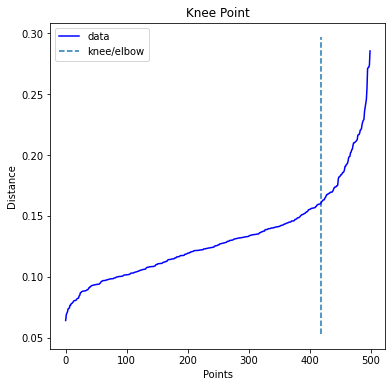

In [2]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])